# England and Wales Precipitation

1)	Plot the seasonal cycle, which is average precipitation (y-axis) against month (x-axs). Average the timeseries for every month (ie. every column) and plot against months 1-12. When is it climatologically driest or wettest?


The MetOffice website containing this data is: https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadEWP_monthly_qc.txt

Populating the interactive namespace from numpy and matplotlib


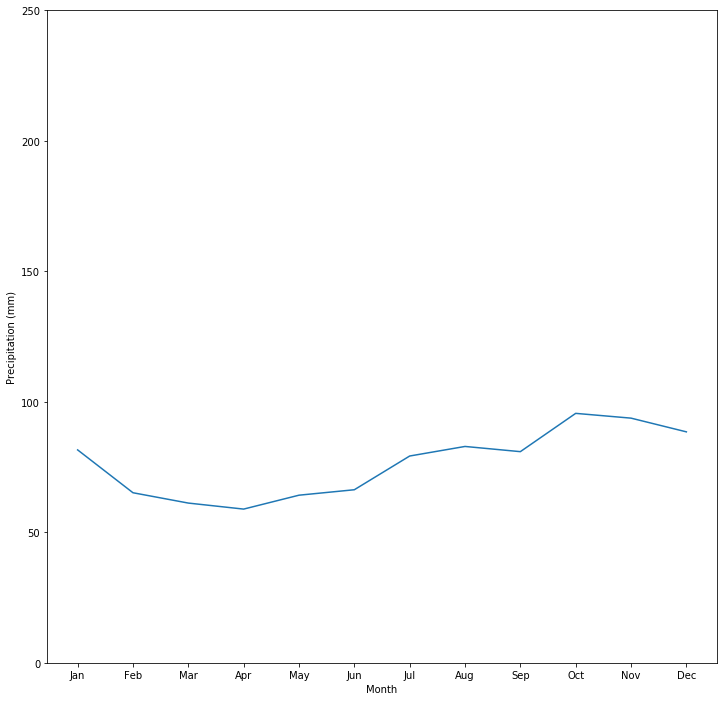

Wettest month is  Oct with 95.595 mm
Driest month is  Apr with 58.909 mm


In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

# Read in data
data = np.genfromtxt('./precip.txt',skip_header=4)
precip_avg = []
for i in range(1, 13):
    avg = np.mean(data[:-1:,i])
    precip_avg.append(avg)

# Generate plot
x = np.arange(12)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 12))
plt.plot(x, precip_avg)
plt.xticks(x, month)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.ylim(0, 250)
plt.show()

# When is it climatologically driest or wettest?
print('Wettest month is ', month[np.argmax(precip_avg)], 'with', np.round(np.amax(precip_avg), 3), 'mm')
print('Driest month is ', month[np.argmin(precip_avg)], 'with', np.round(np.amin(precip_avg), 3), 'mm')

2)	Now find the lowest and highest entry for each month. Plot along and mark the time this occurred. (so find the wettest and driest January and add to your plot etc).  By what factor is the highest entry larger than the average entry? Is there a strong seasonal variation for the driest month?

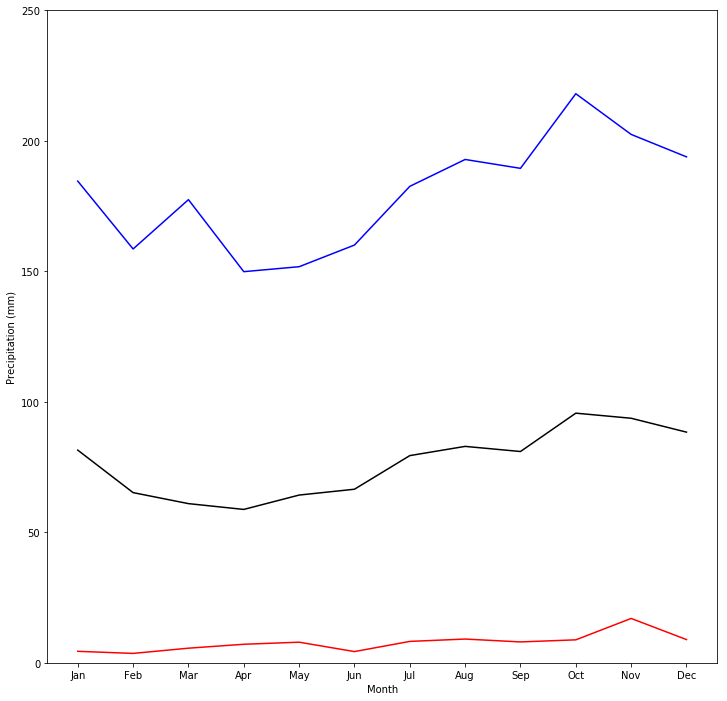

In Jan max precipitation is 2.26 times greater than the average
In Feb max precipitation is 2.43 times greater than the average
In Mar max precipitation is 2.91 times greater than the average
In Apr max precipitation is 2.55 times greater than the average
In May max precipitation is 2.36 times greater than the average
In Jun max precipitation is 2.41 times greater than the average
In Jul max precipitation is 2.3 times greater than the average
In Aug max precipitation is 2.33 times greater than the average
In Sep max precipitation is 2.34 times greater than the average
In Oct max precipitation is 2.28 times greater than the average
In Nov max precipitation is 2.16 times greater than the average
In Dec max precipitation is 2.19 times greater than the average


In [34]:
precip_min = []
precip_max = []

for i in range(1, 13):
    mins = np.amin(data[:-1:,i])
    maxs = np.amax(data[:-1:,i])
    precip_min.append(mins)
    precip_max.append(maxs)
    
plt.figure(figsize=(12, 12))
plt.plot(x, precip_avg, 'k')
plt.plot(x, precip_min, 'r')
plt.plot(x, precip_max, 'b')
plt.xticks(x, month)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.ylim(0, 250)
plt.show()

for i in range(len(precip_avg)):
    factor = precip_max[i]/precip_avg[i]
    print('In', month[i], 'max precipitation is', np.round(factor,2), 'times greater than the average')

3) Sort the data and pick the 90th and 10th percentile (for example, for 250 datapoints pick the 25th and 226th sorted entry and round otherwise) and plot again against month.

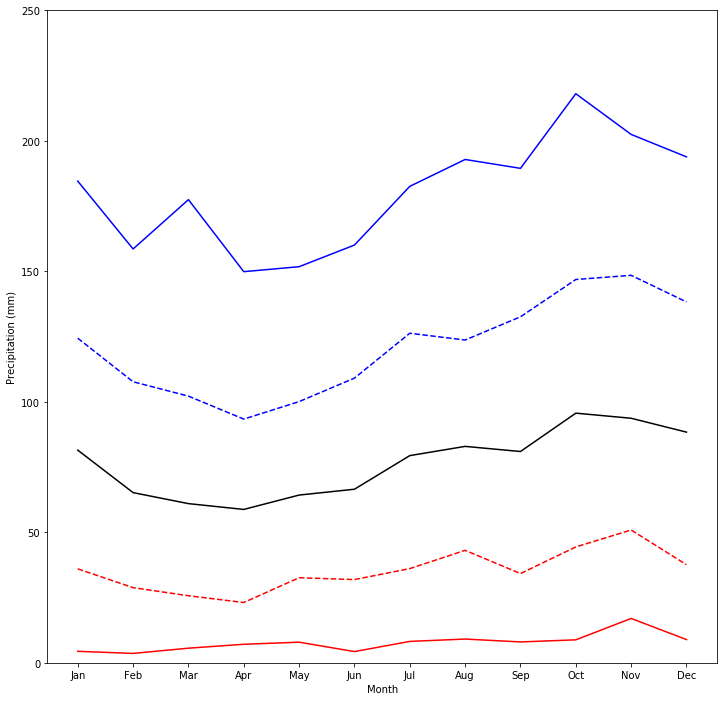

In [42]:
percentile10 = []
percentile90 = []
recordlen = len(data[:-1:,1])
for i in range(1, 13):
    vals = sort(data[:-1:,i])
    percentile10.append(vals[int(0.1*recordlen)])
    percentile90.append(vals[int(0.9*recordlen)])

plt.figure(figsize=(12, 12))
plt.plot(x, precip_avg, 'k')
plt.plot(x, precip_min, 'r')
plt.plot(x, precip_max, 'b')
plt.plot(x, percentile10, 'r', ls='--')
plt.plot(x, percentile90, 'b', ls='--')
plt.xticks(x, month)
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.ylim(0, 250)
plt.show()

4)	Discuss the spread and variability – when is the variability largest? When does it rain most on average and what season has the highest and lowest extremes?

* Spring is driest, followed by summer and winter with autumn being the wettest season in England and Wales 
* If you were to look at Scotland East, for example, you would find spring and autumn  are driest. It is importtant to consider that there can be variation across the country. 
* The spread is largest for the wettest months which is to be expected for a distribution that can't go negative

5)	Now find the monthly rainfall for Storm Desmond (Dec 2015) and count how often that amount was exceeded. Look back and discuss why this wasn’t that unusual in the context of England and Wales average precipitation, and why. 

* Storm Desmond was December 2015 - looking at the text file manually we can see the December 2015 monthly rainfall was 145.9mm.

* The intense rainfall fell in North England and Scotland while the South was average to dry. Hence its not as extreme over the country as it was locally (where it was 3x the expected rainfall in many places). 


In [58]:
storm_des = 145.9
dec = data[:-1:,12]
years = data[:-1:,0]
extremes = years[np.where(dec > storm_des)]
recurr = len(dec)/len(extremes)

print('The years when the average Dec rainfall has exceeded 145.9mm: ', extremes)
print('This equates to an average recurrence rate of every 1 in ', int(recurr), 'years')


The years when the average Dec rainfall has exceeded 145.9mm:  [ 1821.  1868.  1876.  1911.  1914.  1915.  1919.  1929.  1934.  1959.
  1965.  1978.  1979.  1989.  1993.  2002.  2012.]
This equates to an average recurrence rate of every 1 in  14 years


It is important to note there are not as many exceedances early on and there are concerns that the early data miss some rainfall so they have a dry bias.

6)	Look up July 2007 and count exceedances (list the years) – how unusual was that? Look up on the web what happened in July 2007 to precipitation (Google "2007 UK floods") – which months before and after have anomalously high precipitation too? How could that be important for the flooding that ensued? What type of weather caused the heavy rainfall?

* July 2007 was a series of convective storms and May June and July were unusually wet (around and above 90th percentile for each month). 
* By manually inspecting the text file we can see the average rainfall in July 2007 was 137.9mm.


In [56]:
flood = 137.9
jul = data[:-1:,7]
years = data[:-1:,0]
extremes = years[np.where(jul > flood)]
recurr = len(jul)/len(extremes)

print('The years when the average July rainfall has exceeded 137.9mm: ', extremes)
print('This equates to an average recurrence rate of every 1 in ', int(recurr), 'years')

The years when the average July rainfall has exceeded 137.9mm:  [ 1767.  1775.  1779.  1787.  1798.  1816.  1822.  1828.  1829.  1834.
  1839.  1875.  1880.  1888.  1936.  1988.  2009.]
This equates to an average recurrence rate of every 1 in  14 years
